In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.optimizers import Adam
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/license-plate-detection/__results__.html
/kaggle/input/license-plate-detection/indian_license_plates.csv
/kaggle/input/license-plate-detection/custom.css
/kaggle/input/license-plate-detection/__notebook__.ipynb
/kaggle/input/license-plate-detection/__output__.json
/kaggle/input/license-plate-detection/__resultx__.html
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car110.jpeg
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car32.jpeg
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car39.jpeg
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car13.jpeg
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car17.jpeg
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car53.jpeg
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car179.jpeg
/kaggle/input/license-plate-detection/Indian Number Plates/licensed_car107.jpeg
/kaggle/input/license-plate-det

In [13]:
import cv2
from keras.layers import Dense,Conv2D,Flatten
from keras.models import Sequential,Model
from keras.applications.vgg16 import VGG16


In [14]:
img_size=(224,224)
channel=3
height=224
width=224
df=[]
for i in range(0,237):
  s=["../input/license-plate-detection/Indian Number Plates/licensed_car",str(i),".jpeg"]
  f=cv2.imread(s[0]+s[1]+s[2])
  f=cv2.resize(f,img_size)
  df=df+[f]   
df=np.array(df)

In [15]:
data=pd.read_csv("../input/license-plate-detection/indian_license_plates.csv")
data

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0,806,466,0.722084,0.587983,0.868486,0.688841
1,licensed_car1,494,449,0.161943,0.850780,0.582996,1.000000
2,licensed_car2,500,314,0.082000,0.697452,0.230000,0.828025
3,licensed_car3,500,469,0.434000,0.667377,0.718000,0.765458
4,licensed_car4,1001,563,0.208791,0.390764,0.865135,0.984014
...,...,...,...,...,...,...,...
232,licensed_car232,500,366,0.344000,0.609290,0.706000,0.778689
233,licensed_car233,500,333,0.368000,0.453453,0.616000,0.618619
234,licensed_car234,500,332,0.334000,0.608434,0.628000,0.768072
235,licensed_car235,586,331,0.295222,0.601208,0.441980,0.719033


UPLACP OTS

 

UP 14 CP 6748


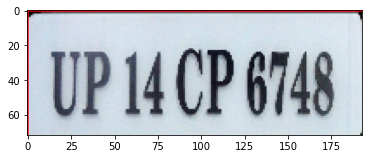

In [16]:
import matplotlib.pyplot as plt
import pytesseract
def show_img(index):
    image=df[index,:]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(width, height))
    ty=int(data["top_y"].iloc[index]*height)
    tx=int(data["top_x"].iloc[index]*width)
    bx=int(data["bottom_x"].iloc[index]*width)
    by=int(data["bottom_y"].iloc[index]*height)
    image=cv2.rectangle(image,(tx,ty),(bx,by),(255,0,0),1)
    #rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
    cropped= image[ty:by,tx:bx]
    text = pytesseract.image_to_string(image) 
    print(text)
    plt.imshow(cropped)
    plt.show
show_img(29)

In [17]:
X_train=df[0:200]
X_test=df[200:237]
Y_train=data.loc[0:199,["top_x","top_y","bottom_x","bottom_y"]]
Y_test=data.loc[200:236,["top_x","top_y","bottom_x","bottom_y"]]

In [18]:
X_train[1]

array([[[164, 205, 220],
        [155, 198, 215],
        [158, 201, 220],
        ...,
        [172, 194, 211],
        [170, 192, 209],
        [175, 199, 215]],

       [[160, 200, 219],
        [159, 200, 220],
        [154, 196, 219],
        ...,
        [189, 220, 236],
        [185, 215, 232],
        [190, 220, 237]],

       [[161, 200, 222],
        [163, 204, 227],
        [159, 200, 225],
        ...,
        [177, 214, 232],
        [168, 205, 223],
        [169, 205, 223]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 66,  65,  60],
        [ 67,  66,  62],
        [ 63,  62,  57]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 64,  63,  59],
        [ 66,  65,  61],
        [ 63,  62,  58]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 78,  77,  73],
        [ 80,  79,  75],
        [ 80,  79,  75]]

In [25]:
adam=Adam(lr=0.05)
model=Sequential()
model.add(VGG16(weights="imagenet",include_top=False,input_shape=(height,width,channel)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
model.layers[-6].trainable=False

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 260       
Total params: 17,938,756
Trainable params: 3,224,068
Non-trainable params: 14,714,688
__________________________________

In [26]:
model.compile(optimizer='adam',loss='mse')
model.fit(X_train,Y_train,batch_size=10,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
20/20 [==============================] - 60s 3s/step - loss: 0.0265 - val_loss: 0.0194
Epoch 2/20
20/20 [==============================] - 59s 3s/step - loss: 0.0218 - val_loss: 0.0141
Epoch 3/20
20/20 [==============================] - 59s 3s/step - loss: 0.0184 - val_loss: 0.0136
Epoch 4/20
20/20 [==============================] - 59s 3s/step - loss: 0.0177 - val_loss: 0.0146
Epoch 5/20
20/20 [==============================] - 59s 3s/step - loss: 0.0160 - val_loss: 0.0104
Epoch 6/20
20/20 [==============================] - 59s 3s/step - loss: 0.0161 - val_loss: 0.0146
Epoch 7/20
20/20 [==============================] - 59s 3s/step - loss: 0.0164 - val_loss: 0.0128
Epoch 8/20
20/20 [==============================] - 59s 3s/step - loss: 0.0150 - val_loss: 0.0117
Epoch 9/20
20/20 [==============================] - 59s 3s/step - loss: 0.0138 - val_loss: 0.0108
Epoch 10/20
20/20 [==============================] - 59s 3s/step - loss: 0.0134 - val_loss: 0.0094
Epoch 11/20
20/20 [

In [ ]:
import cv2 
import pytesseract 
  
  
# Read image from which text needs to be extracted 
#img = cv2.imread("sample.jpg") 
  
# Preprocessing the image starts 
  
# Convert the image to gray scale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Performing OTSU threshold 
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
  
# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 
  
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
  
# Finding contours 
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE) 
  
# Creating a copy of image 
im2 = img.copy() 
  
# A text file is created and flushed 
file = open("recognized.txt", "w+") 
file.write("") 
file.close() 
  
# Looping through the identified contours 
# Then rectangular part is cropped and passed on 
# to pytesseract for extracting text from it 
# Extracted text is then written into the text file 
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
      
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
      
    # Open the file in append mode 
    file = open("recognized.txt", "a") 
      
    # Apply OCR on the cropped image 
    text = pytesseract.image_to_string(cropped) 
      
    # Appending the text into file 
    file.write(text) 
    file.write("\n") 
      
    # Close the file 
    file.close 


In [ ]:
t=X_test[1].reshape(1,224,224,3)
t.shape
print(t)

[[ 24.602474  62.51778  200.24811  179.10347 ]]


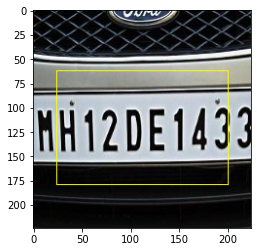

HI2DE14:


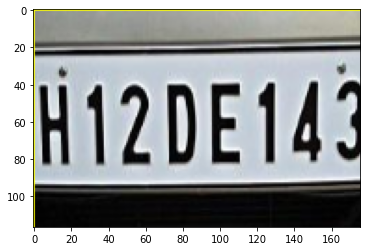

In [46]:
t=X_train[39].reshape(1,224,224,3)
img = t
y_out=model.predict(img)*width
xt,yt = y_out[0][0], y_out[0][1]
xb,yb = y_out[0][2], y_out[0][3]
print(y_out)
img=img.reshape(224,224,3)    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = cv2.rectangle(img, (xt, yt), (xb, yb), (255,255,0), 1)
plt.imshow(image)
plt.show()
"""
y_hat = model.predict(img.reshape(1, 224, 224, 3)).reshape(-1) * width
xt, yt = y_hat[0], y_hat[1]
xb, yb = y_hat[2], y_hat[3]
print(y_hat)
img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)
plt.imshow(image)
plt.show()"""
cropped= image[int(yt):int(yb),int(xt):int(xb)]
text = pytesseract.image_to_string(cropped) 
print(text)
plt.imshow(cropped)
plt.show()


In [ ]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter


In [ ]:
x=[[2,3]]
x[0][1]